In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import pandas as pd
from twitter.twitter_collection import TwitterCollection
from twitter.tweet_sentiment_analyzer import TweetSentimentAnalyzer
from data_pipelines.data_manipulation import DataManipulation
from logger.logger import Logger

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action = 'ignore', category = pd.errors.PerformanceWarning)
%matplotlib inline

Python-dotenv could not parse statement starting at line 11
[nltk_data] Downloading package stopwords to /home/kozan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
SYMBOL = 'BTC-USD'
SYMBOL_NAME = 'Bitcoin'
SYMBOL_CUT = 'btc'
scale = 1
range_list = [5,6,7,8,10,15,20]
range_list = [i*scale for i in range_list]
interval = '1d'
start_date = '2020-06-30'
end_date = '2022-06-30'
source = 'yahoo'
LOG_PATH = '../logger' + os.sep + "logs"
LOG_FILE_NAME_PREFIX = f"log_{SYMBOL_CUT}_{start_date}_{end_date}"

logger = Logger(LOG_PATH, LOG_FILE_NAME_PREFIX)
tsa = TweetSentimentAnalyzer()
data = DataManipulation(SYMBOL, source, range_list, start_date=start_date, 
                        end_date=end_date, interval=interval, scale=scale, 
                        prefix_path='..', saved_to_csv=True,
                        logger=logger)
df_price = data.df.copy()

1 ) 07-12-2022 23_40_29 MainThread INFO\ Initialized logging at path ../logger/logs/log_btc_2020-06-30_2022-06-30_07-12-2022_23_40_29.log
2 ) 07-12-2022 23_40_29 MainThread DEBUG\ Get data from local file ../data/outputs/data_ind/BTC-USD/BTC-USD_df_2020-06-30_2022-06-30_1d.csv


In [3]:
df_price_ext = data.extract_features()
close_col = df_price.loc['2021-01-01':'2022-06-27',['close','volume']].copy()

In [4]:
sent_tweets = pd.read_csv('btc_archieve/btc_daily_sent_score.csv')
sent_tweets.Date = pd.to_datetime(sent_tweets.Date)
sent_tweets.set_index('Date', inplace=True, drop=True)

In [5]:
df_final = tsa.concat_ohlc_compound_score(df_price_ext, sent_tweets)
df_final = df_final.loc['2021-01-01':,:].copy()
df_final.dropna(inplace=True)

In [6]:
data.normalized_df(df_final, 'compound_total')
data.normalized_df(df_final, 'kz_score')
df_final.tail()

,st_stoch,st_ich,st_cut_ema5_sma10,st_macd,st_ich_close,st_dmi,st_cut_sma10_close,st_hisse,st_mfi,st_fishert,...,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,feature_label,kz_score,compound_total
2022-06-23,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,2.0000,...,1.0000,1.0000,1.0000,0.0000,1.0000,0.0000,1.0000,1.0000,0.4500,0.2979
2022-06-24,1.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,2.0000,...,0.0000,1.0000,1.0000,1.0000,0.0000,1.0000,0.0000,1.0000,0.4937,0.2915
2022-06-25,1.0000,0.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,2.0000,2.0000,...,1.0000,0.0000,1.0000,1.0000,1.0000,0.0000,1.0000,0.0000,0.5593,0.2754
2022-06-26,0.0000,0.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,2.0000,2.0000,...,1.0000,1.0000,0.0000,1.0000,1.0000,1.0000,0.0000,0.0000,0.4853,0.3340
2022-06-27,0.0000,0.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,2.0000,2.0000,...,1.0000,1.0000,1.0000,0.0000,1.0000,1.0000,1.0000,0.0000,0.3550,0.3223


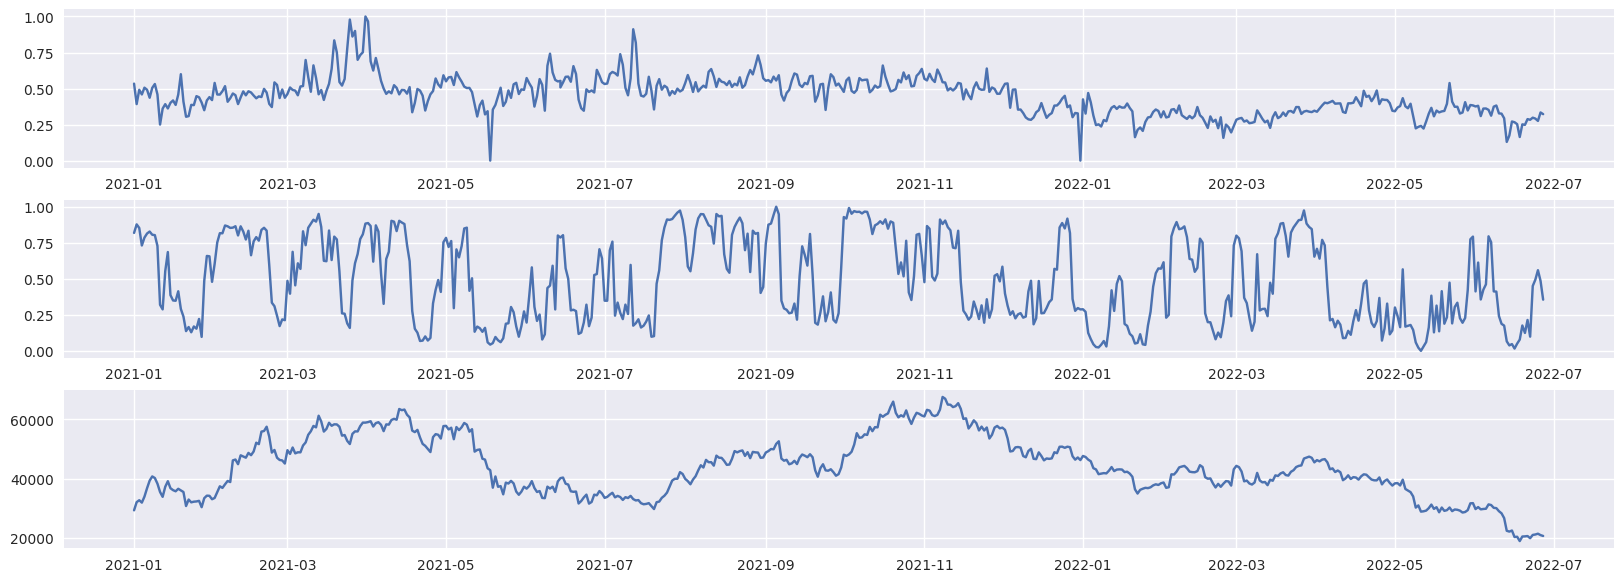

In [7]:
fig, (ax1, ax2,ax3) = plt.subplots(3, 1, figsize=(20,7))
ax1.plot(df_final.compound_total)
ax2.plot(df_final.index, df_final.kz_score)
ax3.plot(close_col.index, close_col.close)

In [8]:
df = df_final.copy()
df.reset_index(drop=True, inplace=True)
df.head()

,st_stoch,st_ich,st_cut_ema5_sma10,st_macd,st_ich_close,st_dmi,st_cut_sma10_close,st_hisse,st_mfi,st_fishert,...,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,feature_label,kz_score,compound_total
0,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,0.0000,3.0000,3.0000,...,1.0000,1.0000,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,0.8182,0.5340
1,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,0.0000,3.0000,3.0000,...,1.0000,1.0000,1.0000,1.0000,0.0000,1.0000,1.0000,1.0000,0.8774,0.3921
2,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,0.0000,3.0000,3.0000,...,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,1.0000,0.0000,0.8525,0.4913
3,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,0.0000,3.0000,3.0000,...,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,1.0000,0.7312,0.4590
4,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,0.0000,3.0000,3.0000,...,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.7857,0.5060


In [23]:
y = df.feature_label
X = df.drop(columns=['feature_label'], axis=1)

In [24]:
X

,st_stoch,st_ich,st_cut_ema5_sma10,st_macd,st_ich_close,st_dmi,st_cut_sma10_close,st_hisse,st_mfi,st_fishert,...,log_return,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,kz_score,compound_total
0,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,0.0000,3.0000,3.0000,...,0.0128,1.0000,1.0000,1.0000,0.0000,1.0000,1.0000,1.0000,0.8182,0.5340
1,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,0.0000,3.0000,3.0000,...,0.0896,1.0000,1.0000,1.0000,1.0000,0.0000,1.0000,1.0000,0.8774,0.3921
2,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,0.0000,3.0000,3.0000,...,0.0202,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,1.0000,0.8525,0.4913
3,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,0.0000,3.0000,3.0000,...,-0.0250,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,0.7312,0.4590
4,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,0.0000,3.0000,3.0000,...,0.0613,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.7857,0.5060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,2.0000,...,0.0535,1.0000,1.0000,1.0000,0.0000,1.0000,0.0000,1.0000,0.4500,0.2979
540,1.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,2.0000,...,0.0069,0.0000,1.0000,1.0000,1.0000,0.0000,1.0000,0.0000,0.4937,0.2915
541,1.0000,0.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,2.0000,2.0000,...,0.0127,1.0000,0.0000,1.0000,1.0000,1.0000,0.0000,1.0000,0.5593,0.2754
542,0.0000,0.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,2.0000,2.0000,...,-0.0223,1.0000,1.0000,0.0000,1.0000,1.0000,1.0000,0.0000,0.4853,0.3340


[0]	validation_0-logloss:0.68279	validation_1-logloss:0.69212
[1]	validation_0-logloss:0.67517	validation_1-logloss:0.68962
[2]	validation_0-logloss:0.66676	validation_1-logloss:0.69021
[3]	validation_0-logloss:0.65836	validation_1-logloss:0.68977
[4]	validation_0-logloss:0.65042	validation_1-logloss:0.69153
[5]	validation_0-logloss:0.64375	validation_1-logloss:0.69164
[6]	validation_0-logloss:0.63531	validation_1-logloss:0.69513
[7]	validation_0-logloss:0.62788	validation_1-logloss:0.69687
[8]	validation_0-logloss:0.61984	validation_1-logloss:0.69476
[9]	validation_0-logloss:0.61326	validation_1-logloss:0.69724
[10]	validation_0-logloss:0.60510	validation_1-logloss:0.69410
[11]	validation_0-logloss:0.60005	validation_1-logloss:0.69237
[12]	validation_0-logloss:0.59627	validation_1-logloss:0.69098
[13]	validation_0-logloss:0.59067	validation_1-logloss:0.69667
[14]	validation_0-logloss:0.58209	validation_1-logloss:0.69424
[15]	validation_0-logloss:0.57504	validation_1-logloss:0.69110
[1

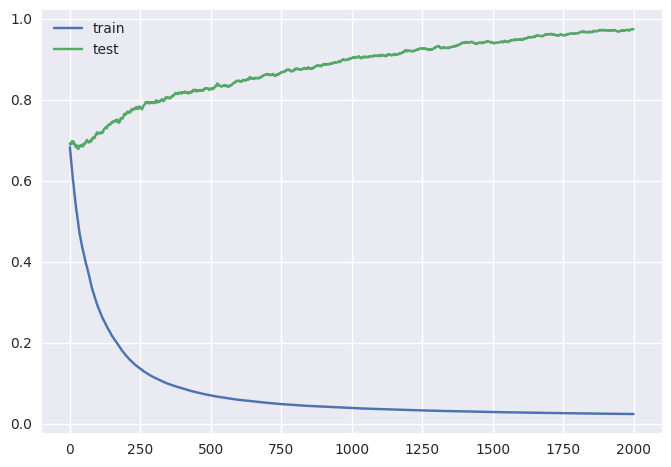

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from matplotlib import pyplot
# define dataset

#X, y = make_classification(n_samples=10000, n_features=50, n_informative=50, n_redundant=0, random_state=1)
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=False)
# define the model
model = XGBClassifier(n_estimators=2000, eta=0.05, subsample=0.5, colsample_bytree=0.5)
# define the datasets to evaluate each iteration
evalset = [(X_train, y_train), (X_test,y_test)]
# fit the model
model.fit(X_train, y_train, eval_metric='logloss', eval_set=evalset)
# evaluate performance
yhat = model.predict(X_test)
score = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % score)
# retrieve performance metrics
results = model.evals_result()
# plot learning curves
pyplot.plot(results['validation_0']['logloss'], label='train')
pyplot.plot(results['validation_1']['logloss'], label='test')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()